In [1]:
import pandas as pd 
import neattext.functions as nfx

In [2]:
# Load ML/Rc Pkgs
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [3]:
df2 = pd.read_csv('../datasets/coursera/Coursera3.csv')
df3 = pd.read_csv('../datasets/coursera/coursera4.csv')

In [4]:
df2_cleaned = df2.drop(['partner', 'certificatetype', 'crediteligibility'], axis=1)
df2_cleaned.head()



,course,skills,rating,reviewcount,level,duration
0,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16.4k,Beginner,3 - 6 Months
1,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133.4k,Beginner,3 - 6 Months
2,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97.3k,Beginner,3 - 6 Months
3,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21.4k,Beginner,3 - 6 Months
4,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181.4k,Beginner,3 - 6 Months


In [5]:
# Find duplicates
df2_duplicates = df2_cleaned.duplicated()

# Filter and keep only duplicate rows
df2_cleaned_duplicates = df2_cleaned[df2_duplicates]

# Print the number of duplicate rows
print(df2_cleaned_duplicates.shape[0])



10


In [6]:
#we drop duplicates
df2_cleaned=df2_cleaned.drop_duplicates()

<Axes: >

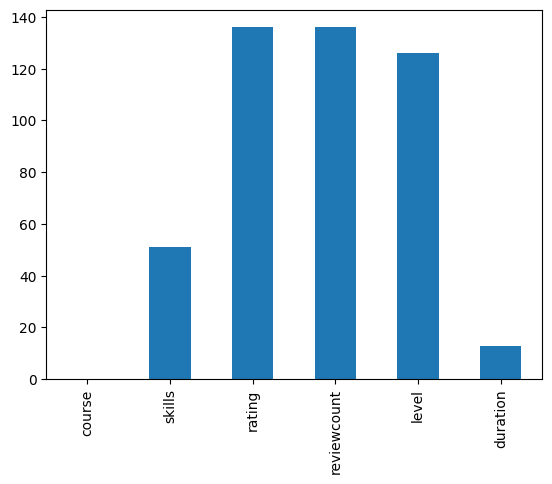

In [7]:
#now we deal with nan values 
df2_cleaned.isna().sum().plot(kind='bar')

In [8]:
#missing values: since we don't have a lot of missing values we can drop them
df2_cleaned=df2_cleaned.dropna()
df2_cleaned.isna().sum()

course         0
skills         0
rating         0
reviewcount    0
level          0
duration       0
dtype: int64

In [9]:
#now we deal we data types of the attributes
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1022
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   course       993 non-null    object 
 1   skills       993 non-null    object 
 2   rating       993 non-null    float64
 3   reviewcount  993 non-null    object 
 4   level        993 non-null    object 
 5   duration     993 non-null    object 
dtypes: float64(1), object(5)
memory usage: 54.3+ KB


In [10]:
#we convert the rating column into a float 
df2_cleaned['rating'] = pd.to_numeric(df2_cleaned['rating'], errors='coerce')
num_nan_rating= df2_cleaned['rating'].isna().sum()
print(f"the number of nan values after converting the rating attribute into a numeric value is: {num_nan_rating} ")
df2_cleaned.info()

the number of nan values after converting the rating attribute into a numeric value is: 0 
<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1022
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   course       993 non-null    object 
 1   skills       993 non-null    object 
 2   rating       993 non-null    float64
 3   reviewcount  993 non-null    object 
 4   level        993 non-null    object 
 5   duration     993 non-null    object 
dtypes: float64(1), object(5)
memory usage: 54.3+ KB


In [11]:
# Convert the reviewcount column into a float
def convert_to_numeric(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    else:
        return float(value)
    
df2_cleaned['reviewcount'] = df2_cleaned['reviewcount'].apply(convert_to_numeric)

In [12]:
print(f"The data_type of the reviewcounts attribute after preprocessing is: {df2_cleaned['reviewcount'].dtypes}")

df2_cleaned.head()

The data_type of the reviewcounts attribute after preprocessing is: float64


,course,skills,rating,reviewcount,level,duration
0,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16400.0,Beginner,3 - 6 Months
1,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133400.0,Beginner,3 - 6 Months
2,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97300.0,Beginner,3 - 6 Months
3,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21400.0,Beginner,3 - 6 Months
4,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181400.0,Beginner,3 - 6 Months


In [13]:
#we deal with the level attribute
df2_cleaned['level'].unique()

array(['Beginner ', 'Intermediate ', 'Advanced ', 'Mixed '], dtype=object)

In [14]:
#we map them with numbers
level_map={'Beginner ':0,  'Intermediate ':1,  'Mixed ':2,   'Advanced ':3 }
df2_cleaned['level'] = df2_cleaned['level'].map(level_map)
df2_cleaned['level'] = pd.to_numeric(df2_cleaned['level'], errors='coerce')
print(f"The data_type of the level attribute after preprocessing is: {df2_cleaned['level'].dtypes}")

df2_cleaned.head()

The data_type of the level attribute after preprocessing is: int64


,course,skills,rating,reviewcount,level,duration
0,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16400.0,0,3 - 6 Months
1,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133400.0,0,3 - 6 Months
2,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97300.0,0,3 - 6 Months
3,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21400.0,0,3 - 6 Months
4,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181400.0,0,3 - 6 Months


In [15]:
#we deal with the duration
df2_cleaned['duration'].unique()

array([' 3 - 6 Months', ' 1 - 3 Months', ' 1 - 4 Weeks',
       ' Less Than 2 Hours'], dtype=object)

In [16]:
#we deal with spaces
df2_cleaned['duration']=df2_cleaned['duration'].str.strip()
df2_cleaned['duration'].unique()

array(['3 - 6 Months', '1 - 3 Months', '1 - 4 Weeks', 'Less Than 2 Hours'],
      dtype=object)

In [17]:
#we rename the columns name
df2_cleaned.rename(columns={'course': 'course_title', 'reviewcount': 'num_reviews', 'duration':'content_duration'}, inplace=True)
df2_cleaned.head()

,course_title,skills,rating,num_reviews,level,content_duration
0,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16400.0,0,3 - 6 Months
1,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133400.0,0,3 - 6 Months
2,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97300.0,0,3 - 6 Months
3,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21400.0,0,3 - 6 Months
4,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181400.0,0,3 - 6 Months


In [18]:
#now wo clean the Dataframe 3
df3_cleaned= df3.drop(['url', 'course_by'],axis=1)
df3_cleaned.head()

,price,title,skills,ratings,reviews,"level, type and duration"
0,Free,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,(35.5k reviews),Mixed · Course · 1-3 Months
1,Free,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,(20.8k reviews),Mixed · Course · 1-3 Months
2,Free,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,(24.4k reviews),Beginner · Course · 1-3 Months
3,Free,The Science of Well-Being for Teens,NaN,4.8,(29 reviews),Beginner · Course · 1-3 Months
4,Free,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,(25.5k reviews),Beginner · Course · 1-3 Months


In [19]:
#we check the nan values 
df3_cleaned.isna().sum()

price                        32
title                         0
skills                      182
ratings                      42
reviews                      42
level, type and duration      0
dtype: int64

In [20]:
#we drop nan values
df3_cleaned = df3_cleaned.dropna()
df3_cleaned.isna().sum()

price                       0
title                       0
skills                      0
ratings                     0
reviews                     0
level, type and duration    0
dtype: int64

In [21]:
#we convert the price attribute into numeric 
print(df3_cleaned['price'].unique() )
df3_cleaned['price']=df3_cleaned['price'].map({'Free':0})
df3_cleaned['price'] = pd.to_numeric(df3_cleaned['price'], errors='coerce')
print(f"The data_type of the price attribute after preprocessing is: {df3_cleaned['price'].dtypes}")

df3_cleaned.head()

['Free']
The data_type of the price attribute after preprocessing is: int64


,price,title,skills,ratings,reviews,"level, type and duration"
0,0,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,(35.5k reviews),Mixed · Course · 1-3 Months
1,0,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,(20.8k reviews),Mixed · Course · 1-3 Months
2,0,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,(24.4k reviews),Beginner · Course · 1-3 Months
4,0,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,(25.5k reviews),Beginner · Course · 1-3 Months
5,0,Writing in the Sciences,"Communication, Writing, Social Media",4.9,(7.5k reviews),Beginner · Course · 1-3 Months


In [22]:
#we deal with reviews attribute
df3_cleaned['reviews']=df3_cleaned['reviews'].str.replace('reviews','')
df3_cleaned['reviews']=df3_cleaned['reviews'].str.replace('(','')
df3_cleaned['reviews']=df3_cleaned['reviews'].str.replace(')','')
df3_cleaned.head()

,price,title,skills,ratings,reviews,"level, type and duration"
0,0,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,35.5k,Mixed · Course · 1-3 Months
1,0,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,20.8k,Mixed · Course · 1-3 Months
2,0,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,24.4k,Beginner · Course · 1-3 Months
4,0,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,25.5k,Beginner · Course · 1-3 Months
5,0,Writing in the Sciences,"Communication, Writing, Social Media",4.9,7.5k,Beginner · Course · 1-3 Months


In [23]:
print(df3_cleaned['reviews'].dtypes)
df3_cleaned['reviews'] = df3_cleaned['reviews'].apply(convert_to_numeric)

df3_cleaned.info()

object
<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 983
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     753 non-null    int64  
 1   title                     753 non-null    object 
 2   skills                    753 non-null    object 
 3   ratings                   753 non-null    float64
 4   reviews                   753 non-null    float64
 5   level, type and duration  753 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 41.2+ KB


In [24]:
df3_cleaned['level, type and duration'].unique()

df3_cleaned['level, type and duration']=df3_cleaned['level, type and duration'].str.replace('Course','')
df3_cleaned['level, type and duration']=df3_cleaned['level, type and duration'].str.replace('·','')

level_type = df3_cleaned['level, type and duration'].str.split("   ", expand = True)


level_type.head()

,0,1
0,Mixed,1-3 Months
1,Mixed,1-3 Months
2,Beginner,1-3 Months
4,Beginner,1-3 Months
5,Beginner,1-3 Months


In [25]:
df3_cleaned['level']=level_type[0]
df3_cleaned['duration']=level_type[1]

df3_cleaned.head()

,price,title,skills,ratings,reviews,"level, type and duration",level,duration
0,0,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,35500.0,Mixed 1-3 Months,Mixed,1-3 Months
1,0,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,20800.0,Mixed 1-3 Months,Mixed,1-3 Months
2,0,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,24400.0,Beginner 1-3 Months,Beginner,1-3 Months
4,0,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,25500.0,Beginner 1-3 Months,Beginner,1-3 Months
5,0,Writing in the Sciences,"Communication, Writing, Social Media",4.9,7500.0,Beginner 1-3 Months,Beginner,1-3 Months


In [26]:
df3_cleaned = df3_cleaned.drop(['level, type and duration'], axis=1)

df3_cleaned.head()

,price,title,skills,ratings,reviews,level,duration
0,0,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,35500.0,Mixed,1-3 Months
1,0,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,20800.0,Mixed,1-3 Months
2,0,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,24400.0,Beginner,1-3 Months
4,0,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,25500.0,Beginner,1-3 Months
5,0,Writing in the Sciences,"Communication, Writing, Social Media",4.9,7500.0,Beginner,1-3 Months


In [27]:
print(df3_cleaned['level'].unique())
#we map them with numbers
level_map={'Beginner':0,  'Intermediate':1,  'Mixed':2,   'Advanced':3 }
df3_cleaned['level'] = df3_cleaned['level'].map(level_map)
df3_cleaned['level'] = pd.to_numeric(df3_cleaned['level'], errors='coerce')
print(f"The data_type of the level attribute after preprocessing is: {df3_cleaned['level'].dtypes}")

df3_cleaned.head()

['Mixed' 'Beginner' 'Intermediate' 'Advanced']
The data_type of the level attribute after preprocessing is: int64


,price,title,skills,ratings,reviews,level,duration
0,0,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,35500.0,2,1-3 Months
1,0,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,20800.0,2,1-3 Months
2,0,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,24400.0,0,1-3 Months
4,0,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,25500.0,0,1-3 Months
5,0,Writing in the Sciences,"Communication, Writing, Social Media",4.9,7500.0,0,1-3 Months


In [28]:
#we rename the columns of df3_cleaned
#we rename the columns name
df3_cleaned.rename(columns={'title': 'course_title', 'reviews': 'num_reviews', 'duration':'content_duration','price':'is_paid','ratings':'rating'}, inplace=True)
df3_cleaned.head()


,is_paid,course_title,skills,rating,num_reviews,level,content_duration
0,0,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,35500.0,2,1-3 Months
1,0,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,20800.0,2,1-3 Months
2,0,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,24400.0,0,1-3 Months
4,0,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,25500.0,0,1-3 Months
5,0,Writing in the Sciences,"Communication, Writing, Social Media",4.9,7500.0,0,1-3 Months


In [29]:
df3_cleaned

,is_paid,course_title,skills,rating,num_reviews,level,content_duration
0,0,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,35500.0,2,1-3 Months
1,0,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,20800.0,2,1-3 Months
2,0,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,24400.0,0,1-3 Months
4,0,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,25500.0,0,1-3 Months
5,0,Writing in the Sciences,"Communication, Writing, Social Media",4.9,7500.0,0,1-3 Months
...,...,...,...,...,...,...,...
975,0,Patrocinio Deportivo,"Marketing, Communication, Entrepreneurship, Le...",4.6,389.0,0,1-3 Months
976,0,Liderazgo,"Business Psychology, Culture, Decision Making,...",4.5,21.0,0,1-4 Weeks
977,0,How to Change the World,Human Learning,4.6,249.0,0,1-3 Months
978,0,"Electrónica Digital Bit a Bit: Fundamentos, Ve...","Theoretical Computer Science, Computational Lo...",4.6,33.0,2,1-3 Months


In [30]:
#we combine the two df2 into one
df_cleaned = pd.concat([df2_cleaned, df3_cleaned], ignore_index=True)

df_cleaned

,course_title,skills,rating,num_reviews,level,content_duration,is_paid
0,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16400.0,0,3 - 6 Months,NaN
1,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133400.0,0,3 - 6 Months,NaN
2,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97300.0,0,3 - 6 Months,NaN
3,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21400.0,0,3 - 6 Months,NaN
4,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181400.0,0,3 - 6 Months,NaN
...,...,...,...,...,...,...,...
1741,Patrocinio Deportivo,"Marketing, Communication, Entrepreneurship, Le...",4.6,389.0,0,1-3 Months,0.0
1742,Liderazgo,"Business Psychology, Culture, Decision Making,...",4.5,21.0,0,1-4 Weeks,0.0
1743,How to Change the World,Human Learning,4.6,249.0,0,1-3 Months,0.0
1744,"Electrónica Digital Bit a Bit: Fundamentos, Ve...","Theoretical Computer Science, Computational Lo...",4.6,33.0,2,1-3 Months,0.0


In [31]:
#we deal with the content_duration
df_cleaned['content_duration'].unique()
df_cleaned['content_duration']=df_cleaned['content_duration'].str.strip()
duration_map_in_days={'3 - 6 Months':135, '1 - 3 Months':60,'1 - 4 Weeks':14,'Less Than 2 Hours':1,'1-3 Months':60, '1-4 Weeks': 14, '3-6 Months':135 }
df_cleaned['content_duration']=df_cleaned['content_duration'].map(duration_map_in_days)

df_cleaned['is_paid']=df_cleaned['is_paid'].fillna(0)


df_cleaned['content_duration'].unique()
    

array([135,  60,  14,   1], dtype=int64)

In [32]:
test_row = df_cleaned.iloc[0]
test_row_df = test_row.to_frame().transpose()

# Resetting the index if necessary
test_row_df.reset_index(drop=True, inplace=True)

print(test_row_df)

           course_title                                             skills  \
0  Google Cybersecurity  {" Network Security"," Python Programming"," L...   

  rating num_reviews level content_duration is_paid  
0    4.8     16400.0     0              135     0.0  


In [33]:
# Clean Text:stopwords,special charac
df_cleaned['clean_course_title'] = df_cleaned['course_title'].apply(nfx.remove_stopwords)
# Clean Text:stopwords,special charac
df_cleaned['clean_course_title'] = df_cleaned['clean_course_title'].apply(nfx.remove_special_characters)

df_cleaned[['course_title','clean_course_title']] 

,course_title,clean_course_title
0,Google Cybersecurity,Google Cybersecurity
1,Google Data Analytics,Google Data Analytics
2,Google Project Management:,Google Project Management
3,Google Digital Marketing & E-commerce,Google Digital Marketing Ecommerce
4,Google IT Support,Google Support
...,...,...
1741,Patrocinio Deportivo,Patrocinio Deportivo
1742,Liderazgo,Liderazgo
1743,How to Change the World,Change World
1744,"Electrónica Digital Bit a Bit: Fundamentos, Ve...",Electrnica Digital Bit Bit Fundamentos Verilog...


In [34]:
# Vectorize our Text
count_vect = TfidfVectorizer()
cv_mat = count_vect.fit_transform(df_cleaned['clean_course_title'])

In [35]:
cv_mat.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names_out())
count_vect.get_feature_names_out()[385]
df_cv_words


,10,101,1650,200,2020,2030,2050,20th,21st,360,...,wrong,xxi,yellow,you,young,yourself,youth,yuan,zhuangziposture,zos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#here we work with the original dataframe to normolize the attributes

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the numeric columns you want to normalize
numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Fit the scaler to your numeric data
scaler.fit(numeric_columns)

# Transform the numeric data to the [0, 1] range
normalized_data = scaler.transform(numeric_columns)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns)

In [38]:
df_cv_words=df_cv_words.reset_index(drop=True)
normalized_df=normalized_df.reset_index(drop=True)


df_final = pd.concat([normalized_df,df_cv_words],axis=1)
df_final.tail(20)

df_final.isna().sum()

rating              0
num_reviews         0
level               0
content_duration    0
is_paid             0
                   ..
yourself            0
youth               0
yuan                0
zhuangziposture     0
zos                 0
Length: 2325, dtype: int64

In [39]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Assuming you have the following variables defined:
# df - your dataframe containing course titles
# course_indices - a mapping from course titles to their index in the dataframe
# cosine_sim_mat - your precomputed cosine similarity matrix

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

def preprocess_title(title):
    # Tokenize the title
    tokens = word_tokenize(title)
    # Convert to lower case
    tokens = [token.lower() for token in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [41]:
df_cleaned
df = df_cleaned

In [42]:
preprocess_title("web dev on - course")

['web', 'dev', '-', 'course']

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process

C:\Users\HR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [44]:

def recommend_course(text,num_of_rec=10):
    def find_best_matches(processed_tokens, df, num_of_rec=10):
        # Combine tokens back to a string
        processed_title = ' '.join(processed_tokens)
        
        # Create a TF-IDF Vectorizer object
        vectorizer = TfidfVectorizer()
        
        # Fit and transform the course titles
        tfidf_matrix = vectorizer.fit_transform(df_cleaned['course_title'])
        
        # Transform the processed title
        processed_tfidf = vectorizer.transform([processed_title])
        
        # Calculate cosine similarity
        cosine_similarities = cosine_similarity(processed_tfidf, tfidf_matrix).flatten()
        
        # Get the top matches indices sorted by similarity score
        top_matches_indices = cosine_similarities.argsort()[-num_of_rec:][::-1]

        # Get the top matches similarity scores
        top_matches_scores = cosine_similarities[top_matches_indices]

        # Create a DataFrame with indices and scores
        top_matches_df = pd.DataFrame({'index': top_matches_indices, 'similarity_score': top_matches_scores})
        
        # Merge the original DataFrame with the top matches DataFrame
        merged_df = top_matches_df.merge(df, left_on='index', right_index=True)
        merged_df = merged_df[merged_df['similarity_score']>0.25]
        
        return merged_df.drop(columns=['index'])
    processed_tokens = preprocess_title(text)
    return find_best_matches(processed_tokens,df,num_of_rec=num_of_rec)




In [48]:
recommend_course('artificial intelligence',20)

,similarity_score,course_title,skills,rating,num_reviews,level,content_duration,is_paid,clean_course_title
0,0.837656,Artificial Intelligence in Marketing,"{"" Digital Marketing"","" Marketing"","" Algorithm...",4.5,146.0,0,14,0.0,Artificial Intelligence Marketing
1,0.808626,Introduction to Artificial Intelligence (AI),"{"" Algorithms"","" Applied Machine Learning"","" A...",4.7,11700.0,0,14,0.0,Introduction Artificial Intelligence AI
2,0.718715,Artificial Intelligence: an Overview,"{"" Machine Learning"","" Leadership and Manageme...",4.5,185.0,0,135,0.0,Artificial Intelligence Overview
3,0.529050,Introduction to TensorFlow for Artificial Inte...,"{"" Machine Learning"","" Tensorflow"","" Artificia...",4.8,19000.0,1,14,0.0,Introduction TensorFlow Artificial Intelligenc...
4,0.484247,Google Business Intelligence,"{"" Business Intelligence"","" Data Management"",""...",4.7,940.0,3,135,0.0,Google Business Intelligence
5,0.449368,Foundations of Business Intelligence,"{"" Business Intelligence"","" Leadership and Man...",4.8,670.0,3,14,0.0,Foundations Business Intelligence
6,0.362670,Data Warehousing for Business Intelligence,"{"" Data Warehousing"","" Data Management"","" Data...",4.5,3900.0,3,135,0.0,Data Warehousing Business Intelligence
7,0.337834,Tableau Business Intelligence Analyst,"{"" Business Analysis"","" Data Analysis"","" Data ...",4.8,97.0,0,135,0.0,Tableau Business Intelligence Analyst
8,0.324006,Introducción a la inteligencia artificial cont...,"Machine Learning, Computer Programming, Machin...",4.7,17.0,0,60,0.0,Introduccin la inteligencia artificial contemp...


In [49]:
recommend_course('artificial intelligence',20)

,similarity_score,course_title,skills,rating,num_reviews,level,content_duration,is_paid,clean_course_title
0,0.837656,Artificial Intelligence in Marketing,"{"" Digital Marketing"","" Marketing"","" Algorithm...",4.5,146.0,0,14,0.0,Artificial Intelligence Marketing
1,0.808626,Introduction to Artificial Intelligence (AI),"{"" Algorithms"","" Applied Machine Learning"","" A...",4.7,11700.0,0,14,0.0,Introduction Artificial Intelligence AI
2,0.718715,Artificial Intelligence: an Overview,"{"" Machine Learning"","" Leadership and Manageme...",4.5,185.0,0,135,0.0,Artificial Intelligence Overview
3,0.529050,Introduction to TensorFlow for Artificial Inte...,"{"" Machine Learning"","" Tensorflow"","" Artificia...",4.8,19000.0,1,14,0.0,Introduction TensorFlow Artificial Intelligenc...
4,0.484247,Google Business Intelligence,"{"" Business Intelligence"","" Data Management"",""...",4.7,940.0,3,135,0.0,Google Business Intelligence
5,0.449368,Foundations of Business Intelligence,"{"" Business Intelligence"","" Leadership and Man...",4.8,670.0,3,14,0.0,Foundations Business Intelligence
6,0.362670,Data Warehousing for Business Intelligence,"{"" Data Warehousing"","" Data Management"","" Data...",4.5,3900.0,3,135,0.0,Data Warehousing Business Intelligence
7,0.337834,Tableau Business Intelligence Analyst,"{"" Business Analysis"","" Data Analysis"","" Data ...",4.8,97.0,0,135,0.0,Tableau Business Intelligence Analyst
8,0.324006,Introducción a la inteligencia artificial cont...,"Machine Learning, Computer Programming, Machin...",4.7,17.0,0,60,0.0,Introduccin la inteligencia artificial contemp...


In [47]:
df_cleaned.to_csv('cleaned_course_data.csv', index=False)